In [ ]:
from datascience import *
import numpy as np
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update(
    "livereveal", {
        "width": "90%",
        "height": "90%",
        "scroll": True,
})

# DSC 10 Discussion Week 2
---
Kyle Vigil

# Some Work With Tables
---

Tables are a handy way to store a bunch of related data.

Let's create our own table using the *datascience package* and play around with it a bit.

As we saw before, we can create a new, empty table by calling Table(). 

In [276]:
tbl = Table()
tbl

## We should probably assign this to a variable if we want to do anything interesting with it!

There are many ways to fill in a table, such as by adding rows or importing from a csv.

Adding columns is a simple way, so let's do that!

We can call the function `with_column` on a Table object.  
Then pass in the parameters: `column_name, [data]`

The values in a column of a table should have **the same type**, so it makes sense to use np.array where possible!

In [175]:
tbl.with_column("interesting numbers", np.arange(5))

interesting numbers
0
1
2
3
4


In [176]:
tbl

Don't forget to reassign to the variable, or your changes will **not** be saved!

In [278]:
tbl = Table()

tbl = tbl.with_column("interesting numbers", make_array(2,3,4,1,5))
# Let's add some more columns together.
tbl = tbl.with_column("more numbers", np.arange(5)).with_column("strings", make_array("this","is","a","string","column"))
tbl = tbl.with_column("boolz rulez", make_array(False, False, True, True, False))
tbl = tbl.with_column("lists", make_array([14,24],[33,42],[5,6],[7,8],[9,10]))
tbl

interesting numbers,more numbers,strings,boolz rulez,lists
2,0,this,False,[14 24]
3,1,is,False,[33 42]
4,2,a,True,[5 6]
1,3,string,True,[7 8]
5,4,column,False,[ 9 10]


We can now do any table operations that we want to this table.

For example we can sort the columns.

What columns can we use to sort by? Are we restricted at all?

In [279]:
tbl.sort("boolz rulez")

interesting numbers,more numbers,strings,boolz rulez,lists
2,0,this,False,[14 24]
3,1,is,False,[33 42]
5,4,column,False,[ 9 10]
4,2,a,True,[5 6]
1,3,string,True,[7 8]


We can get a column of data by calling `column` on the table object.  
Then pass in the argument `column_name`; the name of the column you want.

In [186]:
help(Table.column)

Help on function column in module datascience.tables:

column(self, index_or_label)
    Return the values of a column as an array.
    
    table.column(label) is equivalent to table[label].
    
    >>> tiles = Table().with_columns(
    ...     'letter', make_array('c', 'd'),
    ...     'count',  make_array(2, 4),
    ... )
    
    >>> list(tiles.column('letter'))
    ['c', 'd']
    >>> tiles.column(1)
    array([2, 4])
    
    Args:
        label (int or str): The index or label of a column
    
    Returns:
        An instance of ``numpy.array``.
    
    Raises:
        ``ValueError``: When the ``index_or_label`` is not in the table.



In [187]:
tbl.column("interesting numbers")

array([2, 3, 4, 1, 5])

Notice the data type that is returned!

This means it's easy for us to do calculations immediately after grabbing the columns.

In [188]:
tbl.column("interesting numbers") * 2

array([ 4,  6,  8,  2, 10])

But what will happen when we get the column `"interesting numbers"` with the .select method?

In [195]:
tbl.select("interesting numbers") * 2

TypeError: unsupported operand type(s) for *: 'Table' and 'int'

Questions? Let's try them right now!

# Using `.where()`
--- 
Let's start using some real world data

# Ultimate Halloween Candy Showdown
---
269,000 user submitted winners of head to head candy matchups

In [196]:
candy = Table.read_table("data/candy.csv")
candy

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.86,66.9717
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.6029
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.2611
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.1165
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.3415
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.3475
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.9145
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.4178
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.011
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.5177


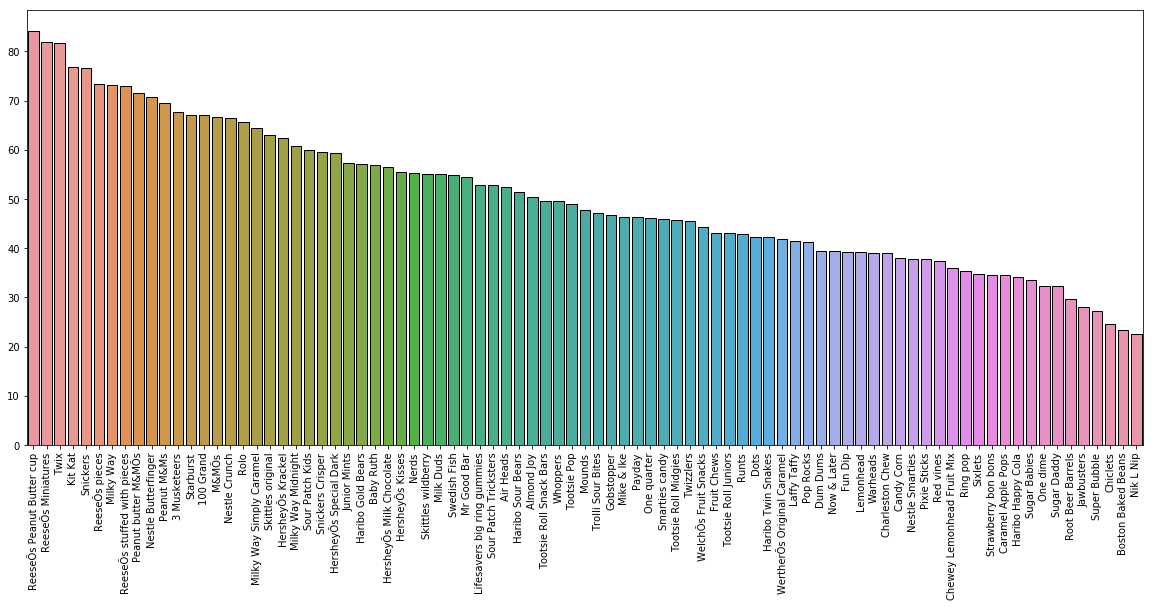

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
candy = candy.sort("winpercent", descending=True)
plt.figure(figsize=(20,8))
sns.barplot(candy.column("competitorname"), candy.column("winpercent"))
plt.xticks(rotation="vertical");

# Let's go over some basics of `where`, `group`, columns on this dataset
---

By getting familiar with our dataset, it should be easier for us to answer questions we have a bit later.

Recall the syntax of the following functions:

`[table_name].where( column_label, are.predicate( value ) ) => copy of table with only rows satisfying condition`

`[table_name].group( column_label, method ) => copy of table with only unique rows from column_label and values calculated by the method, default is count`

`[table_name].column( column_label ) => an array of the column specified`

`[table_name].with_column( column_label, array_values ) => copy of table with a new column named column_label and values from the array_values`

In [ ]:
# If we need any more information, we can always use help

In [198]:
help(Table.where)

Help on function where in module datascience.tables:

where(self, column_or_label, value_or_predicate=None, other=None)
    Return a new ``Table`` containing rows where ``value_or_predicate``
    returns True for values in ``column_or_label``.
    
    Args:
        ``column_or_label``: A column of the ``Table`` either as a label
        (``str``) or an index (``int``). Can also be an array of booleans;
        only the rows where the array value is ``True`` are kept.
    
        ``value_or_predicate``: If a function, it is applied to every value
        in ``column_or_label``. Only the rows where ``value_or_predicate``
        returns True are kept. If a single value, only the rows where the
        values in ``column_or_label`` are equal to ``value_or_predicate``
        are kept.
    
        ``other``: Optional additional column label for
        ``value_or_predicate`` to make pairwise comparisons. See the
        examples below for usage. When ``other`` is supplied,
        ``val

|Predicate|Description|
|---------|-----------|
|`are.above(y)`|Greater than y|
|`are.above_or_equal_to(y)`|Greater than or equal to y|
|`are.below(y)`|Less than y|
|`are.below_or_equal_to(y)`|Less than or equal to y|
|`are.between(y, z)`|Greater than or equal to y and less than z|
|`are.between_or_equal_to(y, z)`|Greater than or equal to y and less than or equal to z|
|`are.contained_in(superstring)`|A string that is part of the given superstring|
|`are.containing(substring)`|A string that contains within it the given substring|
|`are.equal_to(y)`|Equal to y|
|`are.not_above(y)`|Is not above |
|`are.not_above_or_equal_to(y)`|Is neither above y nor equal to |
|`are.not_below(y)`|Is not below |
|`are.not_below_or_equal_to(y)`|Is neither below y nor equal to |
|`are.not_between(y, z)`|Is equal to y or less than y or greater than |
|`are.not_between_or_equal_to(y, z)`|Is less than y or greater than |
|`are.not_contained_in(superstring)`|A string that is not contained within the superstrin|
|`are.not_containing(substring)`|A string that does not contain substrin|
|`are.not_equal_to(y)`|Is not equal to |
|`are.not_strictly_between(y, z)`|Is equal to y or equal to z or less than y or greater than |
|`are.strictly_between(y, z)`|Greater than y and less than z|

Let's play my favorite game: try to use the fewest .where statements to find any one specific candy (without using `competitorname` you cheater)

ex. try to find "tootsie pops" (I can find it with two .where statements)

Columns: `chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent`

In [251]:
candy.where("winpercent", are.between_or_equal_to(27.3, 27.4))

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.3039


In [246]:
import random
candy.column("competitorname").item(random.randint(0,candy.num_rows-1))

'Super Bubble'

# More Data Examples!
---

This data was compiled from a number of queries from the NOAA (National Oceanic and Atmospheric Administration) website. Contains average monthly temperature for 9 different regions from 2000 to 2018.

NOAA National Centers for Environmental information, Climate at a Glance: Regional Time Series, published October 2018, retrieved on October 18, 2018 from https://www.ncdc.noaa.gov/cag/

In [252]:
temps = Table.read_table("data/temperatures.csv")
temps

Year,Month,Region,Average Temperature
2000,1,Northeast Climate Region,21.4
2000,2,Northeast Climate Region,27.2
2000,3,Northeast Climate Region,39.1
2000,4,Northeast Climate Region,44.2
2000,5,Northeast Climate Region,56.6
2000,6,Northeast Climate Region,64.5
2000,7,Northeast Climate Region,65.8
2000,8,Northeast Climate Region,66.2
2000,9,Northeast Climate Region,58.9
2000,10,Northeast Climate Region,49.5


It contains a `Year` (2000 to 2018), `Month` (1 to 12), `Region` (a climate region), and `Average Temperature` (the average temperature for that year/month/region in degrees Farenheit).

In [256]:
# As a helping hand to get started, let's find out what regions we have

np.unique(temps.column("Region"))

array(['Northeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'Northwest Climate Region', 'Ohio Valley Climate Region',
       'South Climate Region', 'Southeast Climate Region',
       'Southwest Climate Region', 'Upper Midwest Climate Region',
       'West Climate Region'], dtype='<U42')

In [254]:
region_names = np.unique(temps.column("Region"))
for region in region_names:
    print(region)

Northeast Climate Region
Northern Rockies and Plains Climate Region
Northwest Climate Region
Ohio Valley Climate Region
South Climate Region
Southeast Climate Region
Southwest Climate Region
Upper Midwest Climate Region
West Climate Region


# Play around with the dataset using `where`, `group`, etc
---

In [257]:
# find the data for just one region
temps.where("Region", are.containing("Ohio"))

Year,Month,Region,Average Temperature
2000,1,Ohio Valley Climate Region,30.8
2000,2,Ohio Valley Climate Region,40.1
2000,3,Ohio Valley Climate Region,47.7
2000,4,Ohio Valley Climate Region,52.6
2000,5,Ohio Valley Climate Region,65.8
2000,6,Ohio Valley Climate Region,71.3
2000,7,Ohio Valley Climate Region,73.6
2000,8,Ohio Valley Climate Region,74.7
2000,9,Ohio Valley Climate Region,66.6
2000,10,Ohio Valley Climate Region,58.5


In [266]:
# find the average temperature for each region
temps.group("Region", max).select("Region", "Average Temperature max")

Region,Average Temperature max
Northeast Climate Region,72.4
Northern Rockies and Plains Climate Region,73.9
Northwest Climate Region,70
Ohio Valley Climate Region,80.6
South Climate Region,86.1
Southeast Climate Region,82.4
Southwest Climate Region,77.7
Upper Midwest Climate Region,75.4
West Climate Region,78.6


In [273]:
# find the average temperature for each year
temps.group("Year", np.mean).select("Year","Average Temperature mean")

Year,Average Temperature mean
2000,52.2444
2001,52.8194
2002,52.4222
2003,52.2963
2004,52.1954
2005,52.6954
2006,53.3278
2007,52.7694
2008,51.4296
2009,51.4954


In [274]:
# find the average temperature for each year for just one region

temps.group(["Year","Region"], np.mean).select("Year","Region","Average Temperature mean")

Year,Region,Average Temperature mean
2000,Northeast Climate Region,46.0333
2000,Northern Rockies and Plains Climate Region,44.0417
2000,Northwest Climate Region,45.9333
2000,Ohio Valley Climate Region,53.8083
2000,South Climate Region,63.4667
2000,Southeast Climate Region,62.6667
2000,Southwest Climate Region,53.9667
2000,Upper Midwest Climate Region,44.5167
2000,West Climate Region,55.7667
2001,Northeast Climate Region,47.7167


In [275]:
# find the average temperature for each month

temps.group("Month", np.mean).select("Month","Average Temperature mean")

Month,Average Temperature mean
1,31.5234
2,34.2871
3,42.7468
4,51.252
5,60.4427
6,68.9632
7,73.9251
8,72.3836
9,65.5117
10,54.1611
